In [28]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. Data (preparing and loading)


In [29]:
population_data = np.genfromtxt('Yearpopulation.txt',delimiter = ',', skip_header = 1 )

population_data = population_data[::-1]



population_data

array([[1.85000000e+03, 1.20000000e+09],
       [1.90000000e+03, 1.60000000e+09],
       [1.92700000e+03, 2.00000000e+09],
       [1.95000000e+03, 2.49309285e+09],
       [1.95100000e+03, 2.53692704e+09],
       [1.95200000e+03, 2.58408634e+09],
       [1.95300000e+03, 2.63410624e+09],
       [1.95400000e+03, 2.68589486e+09],
       [1.95500000e+03, 2.74021379e+09],
       [1.95600000e+03, 2.79540999e+09],
       [1.95700000e+03, 2.85261834e+09],
       [1.95800000e+03, 2.91124967e+09],
       [1.95900000e+03, 2.96595035e+09],
       [1.96000000e+03, 3.01547089e+09],
       [1.96100000e+03, 3.06486968e+09],
       [1.96200000e+03, 3.12337432e+09],
       [1.96300000e+03, 3.19280783e+09],
       [1.96400000e+03, 3.26448734e+09],
       [1.96500000e+03, 3.33453370e+09],
       [1.96600000e+03, 3.40404112e+09],
       [1.96700000e+03, 3.47341288e+09],
       [1.96800000e+03, 3.54518725e+09],
       [1.96900000e+03, 3.61949158e+09],
       [1.97000000e+03, 3.69468379e+09],
       [1.971000

In [30]:

population_tensor = torch.from_numpy(population_data.copy()).float()

X = population_tensor[:,0]
Y = population_tensor[:,1]

X_min = X.min()
X_max = X.max()
Y_min = Y.min()
Y_max = Y.max()

X = (X - X.min()) / (X.max() - X.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())



X.dtype

torch.float32

In [31]:
import numpy as np
import torch

if isinstance(X, np.ndarray):
    print("x is a NumPy array")
elif isinstance(X, torch.Tensor):
    print("x is a PyTorch tensor")
else:
    print("x is neither")

x is a PyTorch tensor


### Split the data into training and test cells

In [32]:
train_test_split = int(len(population_data)*0.9)


X_train = X[:train_test_split]
Y_train = Y[:train_test_split]

X_train, Y_train




X_test = X[train_test_split : ]
Y_test = Y[train_test_split :]

X_test, X_train






Y_train = Y_train[28:]
X_train = X_train[28:]





X_train = X_train.unsqueeze(1)
Y_train = Y_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)
Y_test = Y_test.unsqueeze(1)







X_train, Y_train,X_test, Y_test

(tensor([[0.7143],
         [0.7200],
         [0.7257],
         [0.7314],
         [0.7371],
         [0.7429],
         [0.7486],
         [0.7543],
         [0.7600],
         [0.7657],
         [0.7714],
         [0.7771],
         [0.7829],
         [0.7886],
         [0.7943],
         [0.8000],
         [0.8057],
         [0.8114],
         [0.8171],
         [0.8229],
         [0.8286],
         [0.8343],
         [0.8400],
         [0.8457],
         [0.8514],
         [0.8571],
         [0.8629],
         [0.8686],
         [0.8743],
         [0.8800],
         [0.8857],
         [0.8914],
         [0.8971],
         [0.9029],
         [0.9086],
         [0.9143],
         [0.9200],
         [0.9257],
         [0.9314],
         [0.9371],
         [0.9429],
         [0.9486],
         [0.9543]]),
 tensor([[0.4083],
         [0.4187],
         [0.4292],
         [0.4397],
         [0.4506],
         [0.4619],
         [0.4734],
         [0.4853],
         [0.4974],
         [

In [33]:
def plot_preds (Train_data = X_train , Train_labels = Y_train, Test_data = X_test, Test_labels = Y_test, predictions = None):
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(Train_data, Train_labels, c='g', label='Train Data')
    plt.scatter(Test_data, Test_labels, c='b', label='Test Data')

    if predictions is not None:
        plt.scatter(Test_data, predictions, c='r', label='Predictions')

    plt.legend(prop={"size": 10})






    
    


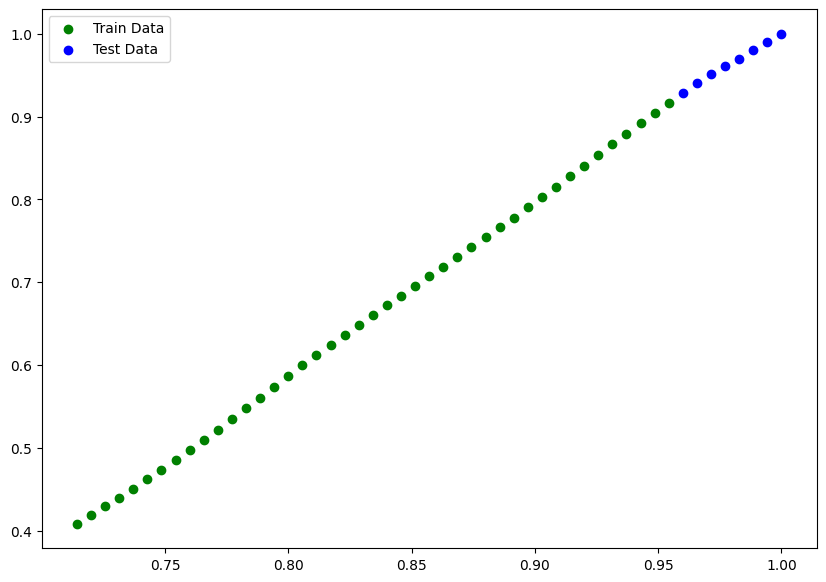

In [34]:
plot_preds()

In [35]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred 

In [36]:
#our model 

our_model = LinearRegression()

In [37]:
loss_fn = nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(our_model.parameters(), lr=0.01)


In [49]:
epoch = 10000
for epoch in range(epoch):
    # forward pass - compute predicted y by passing x to the model
    pred_y = our_model(X_train) 

    loss = loss_fn(pred_y, Y_train)

    optimizer.zero_grad()  # zero the gradients before the backward pass
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # update weights using the optimizer  

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 3.187742913723923e-05
epoch 1, loss 3.18741294904612e-05
epoch 2, loss 3.187091715517454e-05
epoch 3, loss 3.186749745509587e-05
epoch 4, loss 3.186422327416949e-05
epoch 5, loss 3.186088360962458e-05
epoch 6, loss 3.1857638532528654e-05
epoch 7, loss 3.185430250596255e-05
epoch 8, loss 3.185112655046396e-05
epoch 9, loss 3.184767047059722e-05
epoch 10, loss 3.184443630743772e-05
epoch 11, loss 3.1841213058214635e-05
epoch 12, loss 3.1837873393669724e-05
epoch 13, loss 3.183461740263738e-05
epoch 14, loss 3.183117587468587e-05
epoch 15, loss 3.1828039936954156e-05
epoch 16, loss 3.182467116857879e-05
epoch 17, loss 3.182144064339809e-05
epoch 18, loss 3.18181118927896e-05
epoch 19, loss 3.181492502335459e-05
epoch 20, loss 3.1811629014555365e-05
epoch 21, loss 3.180821659043431e-05
epoch 22, loss 3.180500425514765e-05
epoch 23, loss 3.18016427627299e-05
epoch 24, loss 3.179840132361278e-05
epoch 25, loss 3.179509440087713e-05
epoch 26, loss 3.179182385792956e-05
epoch 27,

In [39]:
our_model(X_test)

tensor([[0.7499],
        [0.7539],
        [0.7579],
        [0.7619],
        [0.7659],
        [0.7699],
        [0.7739],
        [0.7779]], grad_fn=<AddmmBackward0>)

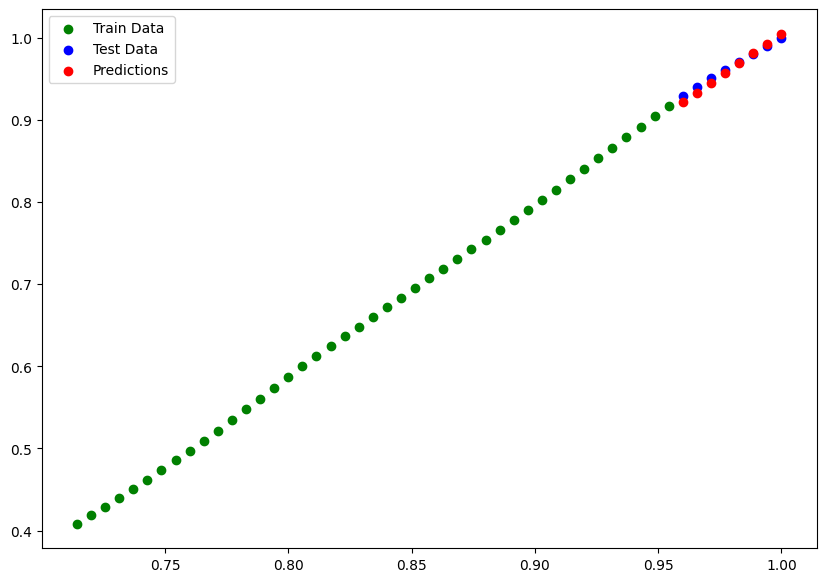

In [50]:
with torch.no_grad():
    plot_preds(X_train, Y_train, X_test, Y_test, our_model(X_test))

In [51]:
for year in range (2025,2031):
    year_to_predict = torch.tensor([[year]])
    year_to_predict = (year_to_predict - X_min) / (X_max - X_min)

    scaled_prediction = our_model(year_to_predict)

    final_prediction = scaled_prediction * (Y_max - Y_min) + Y_min

    print(f"Predicted population for {year}: {final_prediction.item()}")

Predicted population for 2025: 8266321920.0
Predicted population for 2026: 8350285824.0
Predicted population for 2027: 8434248192.0
Predicted population for 2028: 8518212608.0
Predicted population for 2029: 8602176512.0
Predicted population for 2030: 8686139392.0
